<a href="https://colab.research.google.com/github/annettembeyu/unsupervised-learning-techniques-in-R/blob/main/Moringa_School_DSC_Anomaly_Detection_week14_Annette_Ngao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carre Four Sales Analysis



## Defining the Research Question
 
*  Understand the trend in the product sales.
*  Be able to make sales forecast and advice




## Context

The project entails analysing sales data from Carrefour Kenya that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). 

## Metric of Success

The research will have achieved its objective when:

*  most relevant and effective strategies are identified that will lead to the highest number of sales possible.

## Details of the data

The dataset has 1000 rows and 2 columns. The attributes in the data are as follows:

 * Date             
 * Sales

## Data appropriateness

The information gathered is appropriate to make forecast on the sales so as to come up with the best strategies.

## Experimental Design

*  Loading and previewing the dataset 
*  Data Description
*  Data Cleaning;
*  Exploratory Data Analysis
* Implementing the Solution
  

## Loading and previewing the dataset 

In [1]:
# Loading the relevant library necessary to read the data in the correct format
install.packages("tidyverse")
install.packages("readr")
install.packages("lubridate")
install.packages("data.table", dependencies= TRUE)
install.packages("Rcpp")
library(tidyverse)  # data manipulation and visualization
library(readr)      # helps in reading data in r
library(lubridate)
library(data.table)
library(Rcpp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘data.table’


The following objects are masked from

In [3]:
# Loading the dataset
forecast_df <- read.csv(file = "Supermarket_Sales_Forecasting - Sales.csv")

In [4]:
# Changing the column names to a suitable format
names(forecast_df) <- tolower(names(forecast_df))

In [5]:
# previewing the dataset by looking at the first 6 rows
head(forecast_df)

,date,sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [6]:
# Looking at the tail of the dataset(last 6 rows of the dataset)
tail(forecast_df)

,date,sales
,<chr>,<dbl>
995,2/18/2019,63.9975
996,1/29/2019,42.3675
997,3/2/2019,1022.4900
998,2/9/2019,33.4320
999,2/22/2019,69.1110
1000,2/18/2019,649.2990


In [7]:
# picking a random sample of the data
sample(forecast_df)

sales,date
<dbl>,<chr>
548.9715,1/5/2019
80.2200,3/8/2019
340.5255,3/3/2019
489.0480,1/27/2019
634.3785,2/8/2019
627.6165,3/25/2019
433.6920,2/25/2019
772.3800,2/24/2019
76.1460,1/10/2019


In [ ]:
# getting the column names in the data set
names(forecast_df)

[1] "date"  "sales"

 ## Data Description

In [8]:
# previewing the dataset to get the details
print('The datatypes of the attributes in the dataset:');str(forecast_df)
print('The number of columns and rows consecutively are:');dim(forecast_df)
print('The format of the dataset:');class(forecast_df)

[1] "The datatypes of the attributes in the dataset:"
'data.frame':	1000 obs. of  2 variables:
 $ date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ sales: num  549 80.2 340.5 489 634.4 ...
[1] "The number of columns and rows consecutively are:"


[1] 1000    2

[1] "The format of the dataset:"


[1] "data.frame"

The dataset has 1000 rows and 2 columns and it is in dataframe format.

In [9]:
# summary of the different data types in the dataset
table(unlist(lapply(forecast_df, class)))


character   numeric 
        1         1 

**Observation**:the dataset has one(1) attribute which has datetime, one(1) being numeric.

## Data Cleaning

### Missing values in the dataset

In [10]:
# Checking if there are any missing values in the dataset
is.na(forecast_df)

date,sales
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE


In [11]:
# Obtaining the number of missing values in the data 
colSums(is.na(forecast_df))

date sales 
    0     0

***Observation*** There are no missing values in the dataset.

### Outlier detection and Removal

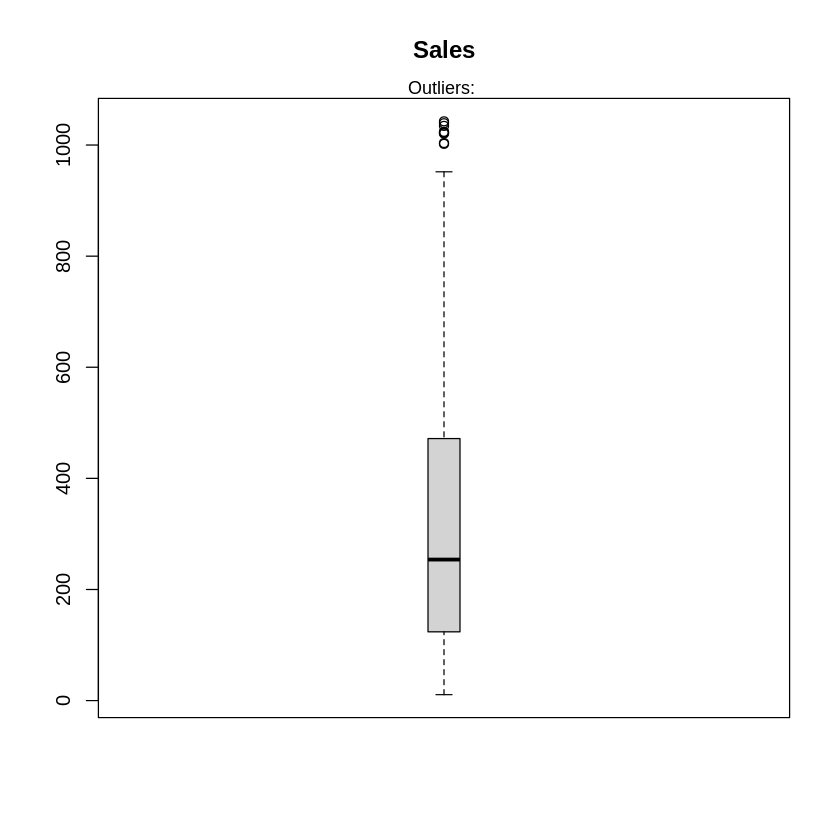

In [12]:
# visualise any existing outliers using boxplots
# Box plot for sales
boxplot(forecast_df$sales, main="Sales", boxwex=0.1)
mtext(paste("Outliers: "), cex=0.9)

**Observation**: There are a few outliers in sales

In [13]:
# Finding outliers in the dataset
print('Outlier values in Sales');boxplot.stats(forecast_df$sales)$out

[1] "Outlier values in Sales"


[1] 1003.590 1039.290 1042.650 1002.120 1020.705 1034.460 1023.750 1022.385
[9] 1022.490

In [14]:
# confirming where the outliers in tax came from
forecast_df$date[forecast_df$`sales` %in% c(1003.59,1039.29,1042.65,1002.12,1020.705,1034.46,1023.75,1022.385,1022.49)]

[1] "1/16/2019" "2/8/2019"  "2/15/2019" "1/9/2019"  "2/8/2019"  "1/30/2019"
[7] "1/12/2019" "1/15/2019" "3/2/2019"

**Observation**: On this specific days there were high sales which would be important for the department concerned to check and investigate.


### Detection and elimination of duplicates

In [15]:
# checking whether there are any duplicates in the data
table(duplicated(forecast_df))


FALSE 
 1000 

**Observation**; From the output it clearly indicates that there are no duplicates.

# Exploratory Data Analysis

In [16]:
# getting the mean sales
mean(forecast_df$sales)

[1] 322.9667

In [17]:
# getting the median sale
median(forecast_df$sales)

[1] 253.848

In [18]:
# getting the standard deviation
sd(forecast_df$sales)

[1] 245.8853

In [19]:
# getting the variance of sales
var(forecast_df$sales)

[1] 60459.6

In [20]:
# getting the maximum sales
max(forecast_df$sales)

[1] 1042.65

In [21]:
# getting the minimum sales
min(forecast_df$sales)

[1] 10.6785

In [22]:
# getting the range of sales
range(forecast_df$sales)

[1]   10.6785 1042.6500

In [23]:
# getting the quantile of the sales
quantile(forecast_df$sales)

0%       25%       50%       75%      100% 
  10.6785  124.4224  253.8480  471.3502 1042.6500

In [24]:
# installing the package to obtain skewness and kurtosis
install.packages("moments")
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# getting the skewness of the sales column
skewness((forecast_df$sales))

[1] 0.8912304

**Observation**:The sales are positively skewed.

In [ ]:
# getting the kurtosis
kurtosis((forecast_df$sales))

[1] 2.91253

**Observation**: The sales are leptokurtic.

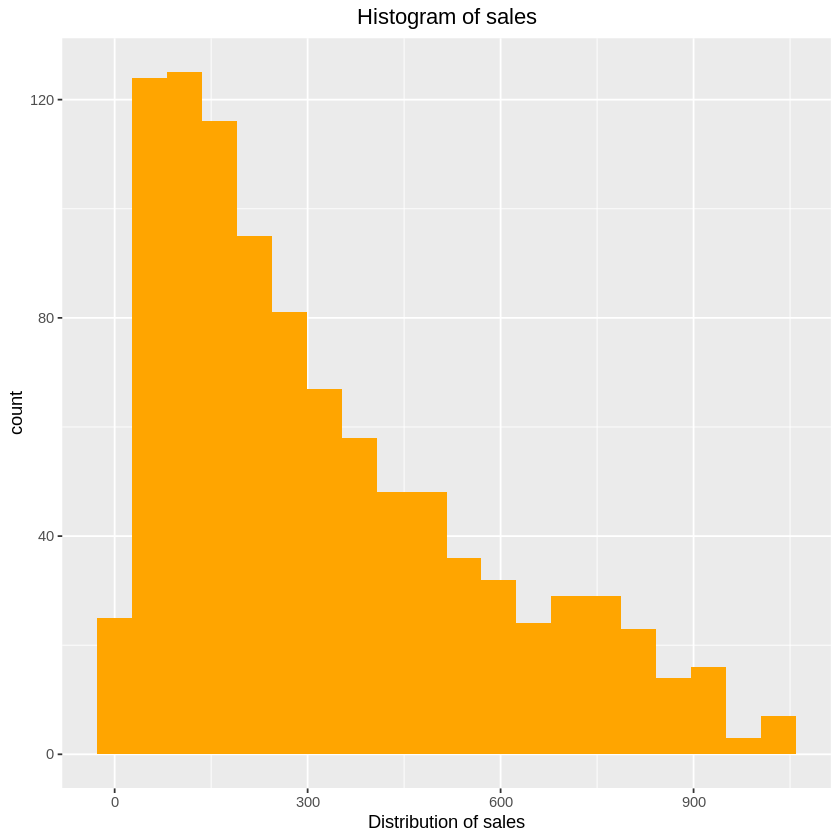

In [25]:
# Histogram of sales
ggplot(data = forecast_df, mapping = aes(x = sales)) +
  geom_histogram(bins = 20, fill = "orange") +
  labs(x = "Distribution of sales") +
  ggtitle("Histogram of sales") +
  theme(plot.title = element_text(hjust = 0.5))



## Impementing the Solution

In [ ]:
# Installing anomalize package
install.packages("anomalize")
library(anomalize)

In [29]:
# Collect  time series data
tidyverse_cran_downloads

date,count,package
<date>,<dbl>,<chr>
2017-01-01,873,tidyr
2017-01-02,1840,tidyr
2017-01-03,2495,tidyr
2017-01-04,2906,tidyr
2017-01-05,2847,tidyr
2017-01-06,2756,tidyr
2017-01-07,1439,tidyr
2017-01-08,1556,tidyr
2017-01-09,3678,tidyr


#### Detecting our anomalies

the following functions to detect and visualize anomalies; 

* decomposition the count, column into observed, season, trend, and remainder columns. 
* the default values for time series decompose are method = "stl", which is just seasonal decomposition using a Loess smoother (refer to stats::stl()). 
* the frequency and trend parameters are automatically set based on the time scale (or periodicity) of the time series using tibbletime based function under the hood.
* time_decompose() - this function would help with time series decomposition.

#### anomalize() - 

* anomaly detection is performed on the decomposed data using the remainder column through the use of the anomalize() function which procides 3 new columns; remainder_11(lower limit), remainder_l2(upper limit), and anomaly(Yes/No Flag).
* the default method is method = "iqr", which is fast and relatively accurate at detecting anomalies. 
* the alpha parameter is by default set to alpha = 0.05, but can be adjusted to increase or decrease the height of the anomaly bands, making it more difficult or less difficult for data to be anomalous. 
* the max_anoms parameter is by default set to a maximum of max_anoms = 0.2 for 20% of data that can be anomalous. 

#### time_recompose()-

* creation of the lower and upper bounds around the observed values through the use of the time_recompose() function, which recomposes the lower and upper bounds of the anomalies around the observed values.
* created new columns created: recomposed_l1 (lower limit) and recomposed_l2 (upper limit).

#### plot_anomalies() - 

* plot using plot_anomaly_decomposition() to visualize out the data.

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



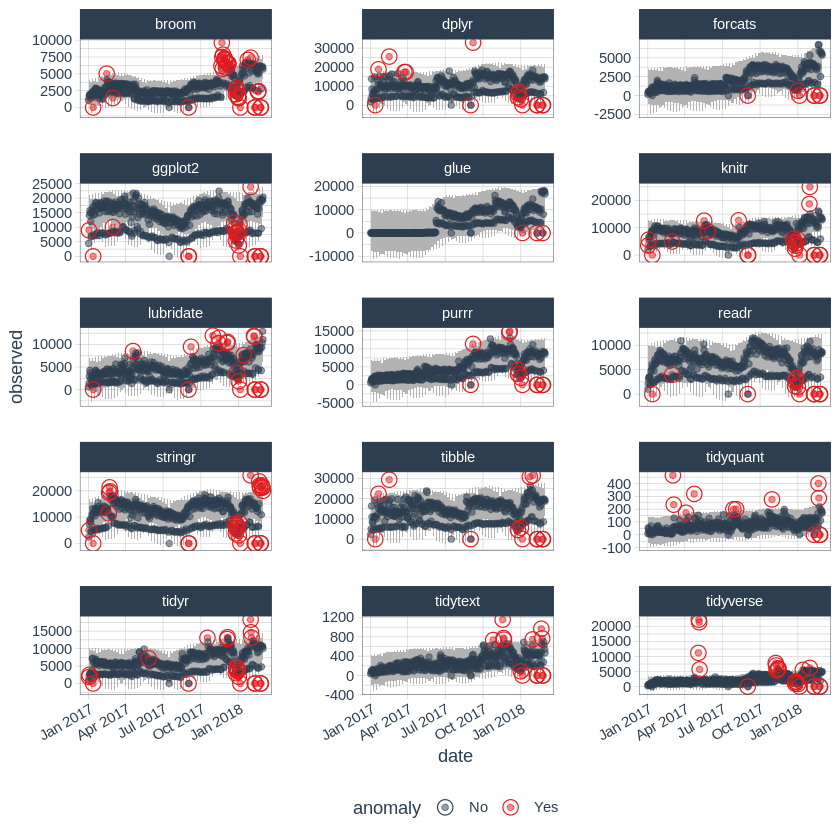

In [35]:
tidyverse_cran_downloads %>%
    time_decompose(count) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)